# Preparing notebook

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['PYTHONHASHSEED'] = '2'

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

import keras
from keras.models import load_model

from F5_func_file import *

/usr/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.1 when it was built against 1.14.0, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


## Load model and data

In [3]:
#Load the upsampling model
upsampling_model = load_model("Upsampling_model.h5", 
                              custom_objects={"Custom_mse_conv_func": Custom_mse_conv_func, "Custom_mae_conv_func": Custom_mae_conv_func})

In [4]:
#Load the NGC 300 spiral galaxy image
#Downloadable as "Fullsize Original" 106.5 MB file from https://www.eso.org/public/images/eso1037a/ 
file_path = "eso1037a.tif"

original_image = Load_astrodata(file_path)

print("Shape:", original_image.shape)
print("Minimum:", original_image.min())
print("Maximum", original_image.max())

Shape: (7603, 7603)
Minimum: 0
Maximum 255


# Chosing segments for resolution enhancement
## Visualize spiral galaxy

In [5]:
#Select region in the full image
size_region = 500
horiz_origin_region = 4450
verti_origin_region = 1600

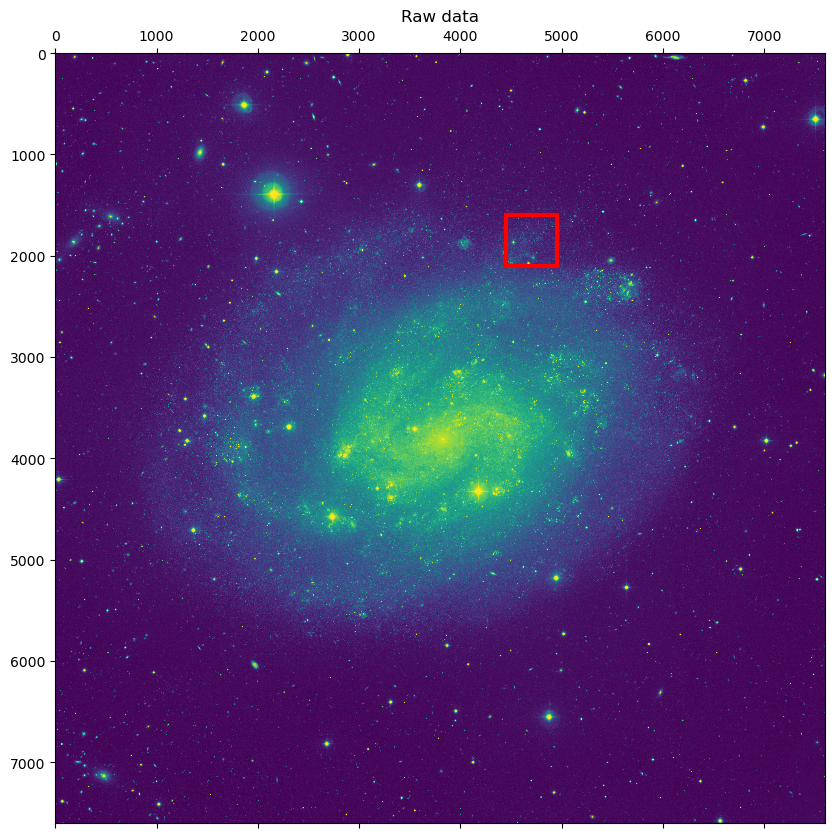

In [6]:
#Visualize the spiral galaxy image
plt.figure(figsize=(10,10))
plt.matshow(original_image, cmap="viridis", fignum=False)

#Add a region-highlighting rectangle 
plt.gca().add_patch(mpl.patches.Rectangle([horiz_origin_region,verti_origin_region], size_region, size_region, linewidth=3, edgecolor='red', facecolor='none'))

plt.title("Raw data")
plt.show()

## Visualize region cutout

In [7]:
#Select segments inside the previous region
size_segments = 50
horiz_origins_segments = [297, 135]
verti_origins_segments = [55, 375]

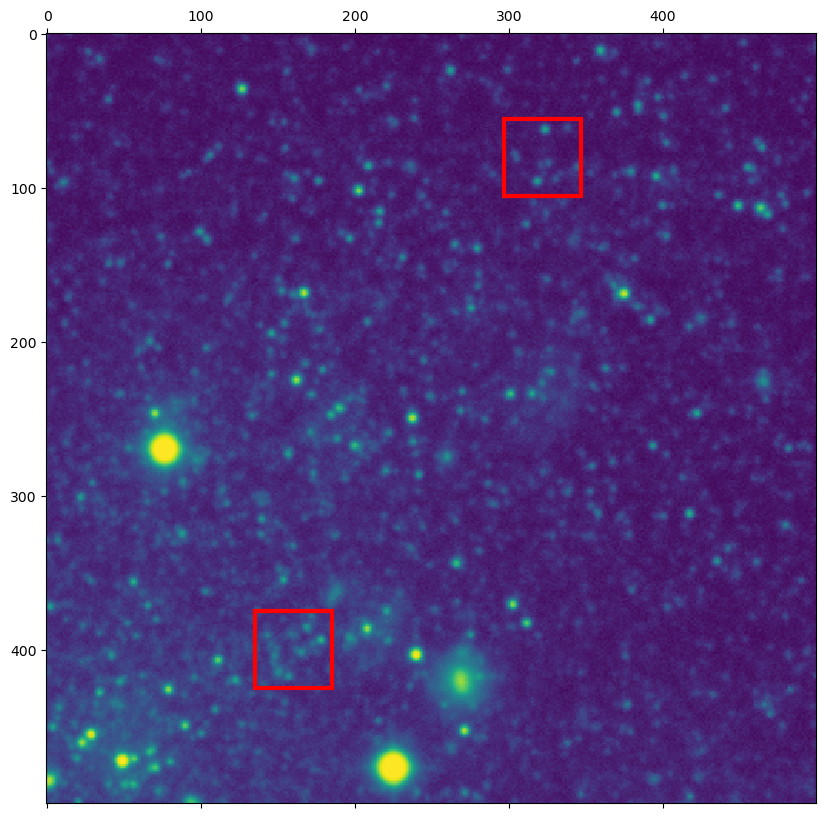

In [8]:
#Visualize the previous region
plt.figure(figsize=(10,10))
zoomed_region = original_image[verti_origin_region:verti_origin_region+size_region, horiz_origin_region:horiz_origin_region+size_region]
plt.matshow(zoomed_region, cmap="viridis", fignum=False)

#Add rectangles highlighting your chosen segments in the region  
for horiz_origins, verti_origins in zip(horiz_origins_segments, verti_origins_segments):
    plt.gca().add_patch(mpl.patches.Rectangle([horiz_origins,verti_origins], size_segments, size_segments, linewidth=3, edgecolor='red', facecolor='none'))

## Visualize segments for resolution enhancing

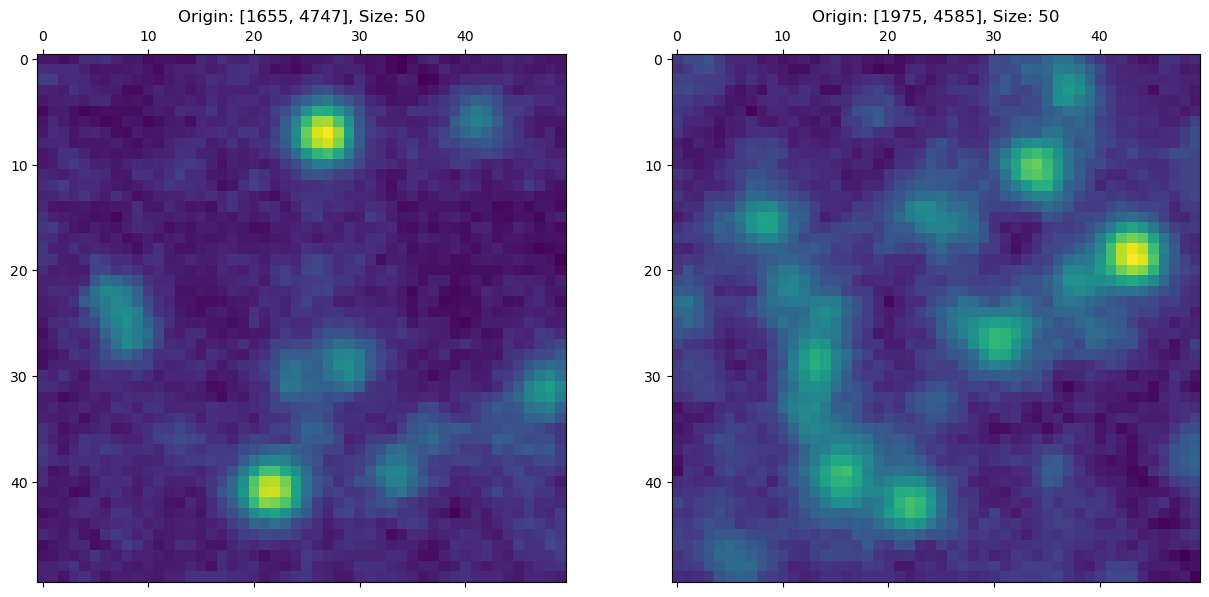

In [9]:
#Visualize the chosen segments
plt.figure(figsize=(15,10))
plt.subplot(121)
segment_1 = zoomed_region[verti_origins_segments[0]:verti_origins_segments[0]+size_segments,horiz_origins_segments[0]:horiz_origins_segments[0]+size_segments]
plt.matshow(segment_1, cmap="viridis", fignum=False)
plt.title("Origin: [" + str(verti_origin_region + verti_origins_segments[0]) + ", " + str(horiz_origin_region + horiz_origins_segments[0]) + "], Size: " + str(size_segments))

plt.subplot(122)
segment_2 = zoomed_region[verti_origins_segments[1]:verti_origins_segments[1]+size_segments,horiz_origins_segments[1]:horiz_origins_segments[1]+size_segments]
plt.matshow(segment_2, cmap="viridis", fignum=False)
plt.title("Origin: [" + str(verti_origin_region + verti_origins_segments[1]) + ", " + str(horiz_origin_region + horiz_origins_segments[1]) + "], Size: " + str(size_segments))

plt.show()

# Evaluating

In [10]:
#Process the segments
segments = np.array([segment_1, segment_2])

predicted, _ = Reconstruct_data_with_model(segments, upsampling_model)
predicted.shape

1/1 [==============================] - 2s 2s/step


(2, 200, 200)

## First segment visualization

Text(0.5, 1.0, 'DAMN + Gaussian filter')

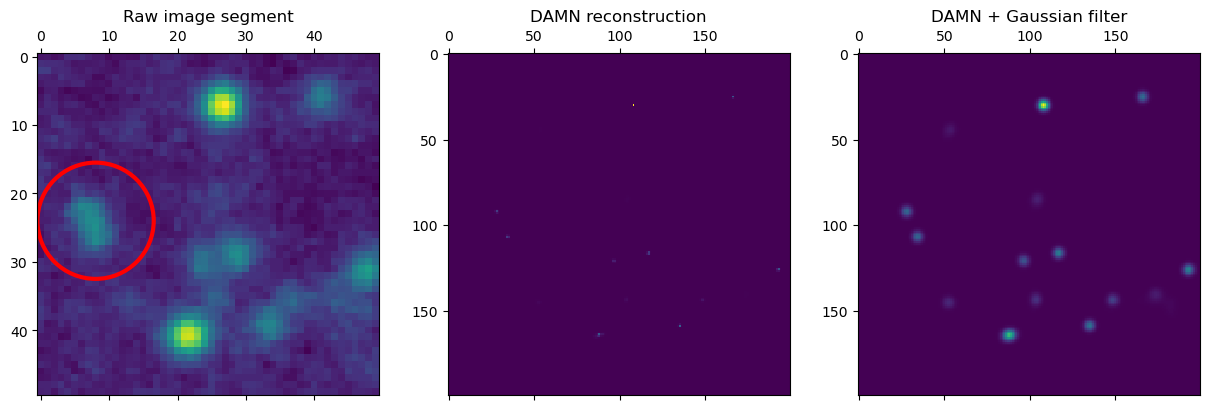

In [11]:
#Visualize the images in panel (C)
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.matshow(segments[0], cmap="viridis", fignum=False)
plt.gca().add_patch(mpl.patches.Circle([8,24], 8.5, linewidth=3, edgecolor='red', facecolor='none'))
plt.title("Raw image segment")

plt.subplot(132)
plt.matshow(predicted[0], cmap="viridis", fignum=False)
plt.title("DAMN reconstruction")

plt.subplot(133)
plt.matshow(gaussian_filter(predicted[0],2), cmap="viridis", fignum=False)
plt.title("DAMN + Gaussian filter")

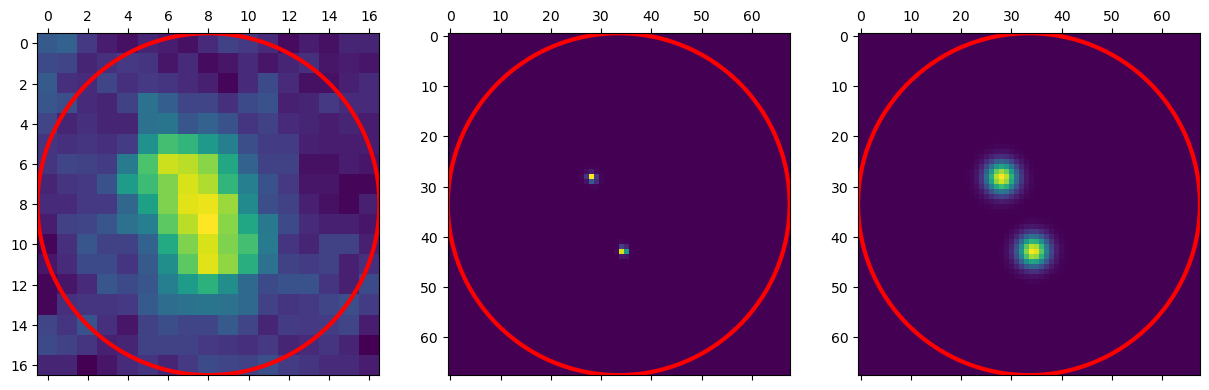

In [12]:
#Visualize the inset of panel (C)
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.matshow(segments[0][16:33, 0:17], cmap="viridis", fignum=False)
plt.gca().add_patch(mpl.patches.Circle([8,8], 8.5, linewidth=3, edgecolor='red', facecolor='none'))


plt.subplot(132)
plt.matshow(predicted[0][64:132, 0:68], cmap="viridis", fignum=False)
plt.gca().add_patch(mpl.patches.Circle([33.5,33.5], 34, linewidth=3, edgecolor='red', facecolor='none'))


plt.subplot(133)
plt.matshow(gaussian_filter(predicted[0],2)[64:132, 0:68], cmap="viridis", fignum=False)
plt.gca().add_patch(mpl.patches.Circle([33.5,33.5], 34, linewidth=3, edgecolor='red', facecolor='none'))

## Second segment visualization

Text(0.5, 1.0, 'DAMN + Gaussian filter')

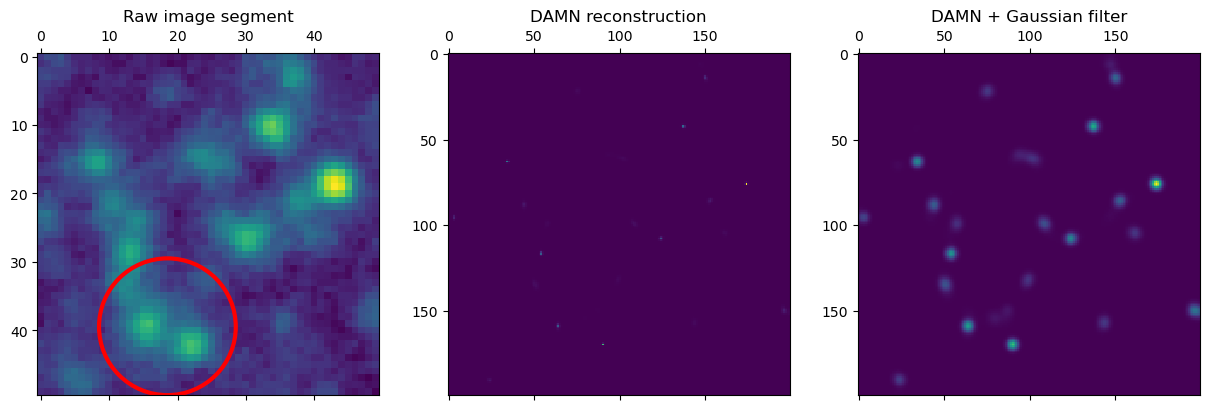

In [13]:
#Visualize the images in panel (D)
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.matshow(segments[1], cmap="viridis", fignum=False)
plt.gca().add_patch(mpl.patches.Circle([18.5,39.5], 10, linewidth=3, edgecolor='red', facecolor='none'))
plt.title("Raw image segment")

plt.subplot(132)
plt.matshow(predicted[1], cmap="viridis", fignum=False)
plt.title("DAMN reconstruction")

plt.subplot(133)
plt.matshow(gaussian_filter(predicted[1],2), cmap="viridis", fignum=False)
plt.title("DAMN + Gaussian filter")

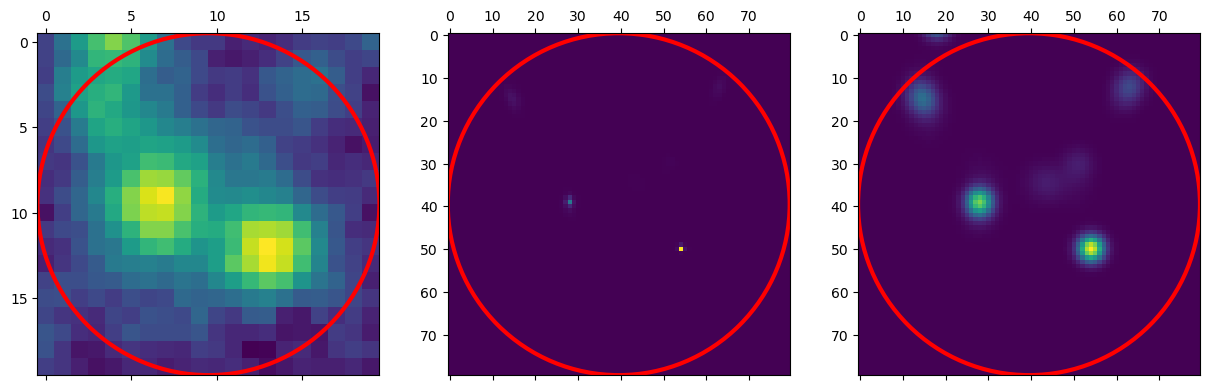

In [14]:
#Visualize the inset of panel (D)
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.matshow(segments[1][30:50, 9:29], cmap="viridis", fignum=False)
plt.gca().add_patch(mpl.patches.Circle([9.5,9.5], 10, linewidth=3, edgecolor='red', facecolor='none'))

plt.subplot(132)
plt.matshow(predicted[1][120:200, 36:116], cmap="viridis", fignum=False)
plt.gca().add_patch(mpl.patches.Circle([39.5,39.5], 40, linewidth=3, edgecolor='red', facecolor='none'))

plt.subplot(133)
plt.matshow(gaussian_filter(predicted[1],2)[120:200, 36:116], cmap="viridis", fignum=False)
plt.gca().add_patch(mpl.patches.Circle([39.5,39.5], 40, linewidth=3, edgecolor='red', facecolor='none'))